# Assignment 2

## Exercise 1

In [23]:
import wrds
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
db = wrds.Connection(wrds_username='jonkq')
db.create_pgpass_file()

Enter your WRDS username [jonkq]:jonkq
Enter your password:········
WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [3]:
aapl=db.raw_sql("select date, ret from crsp.dsf where permco in (7) and date>='1999-12-31' and date<='2020-12-31'")
aapl.to_csv('aapl.csv')

gs=db.raw_sql("select date, ret from crsp.dsf where permco in (35048) and date>='1999-12-31' and date<='2020-12-31'")
gs.to_csv('gs.csv')

msft=db.raw_sql("select date, ret from crsp.dsf where permco in (8048) and date>='1999-12-31' and date<='2020-12-31'")
msft.to_csv('msft.csv')

pg=db.raw_sql("select date, ret from crsp.dsf where permco in (21446) and date>='1999-12-31' and date<='2020-12-31'")
pg.to_csv('pg.csv')

ge=db.raw_sql("select date, ret from crsp.dsf where permco in (20792) and date>='1999-12-31' and date<='2020-12-31'")
ge.to_csv('ge.csv')

In [41]:
aapl = pd.read_csv('aapl.csv', index_col=0)
gs = pd.read_csv('gs.csv', usecols=['ret']).squeeze()
msft = pd.read_csv('msft.csv', usecols=['ret']).squeeze()
pg = pd.read_csv('pg.csv', usecols=['ret']).squeeze()
ge = pd.read_csv('ge.csv', usecols=['ret']).squeeze()

#### a)

In [42]:
aapl.date = pd.to_datetime(aapl.date)
ret = pd.DataFrame({'date': aapl.date, 'aapl': aapl.ret, 'gs':gs,
                   'msft':msft, 'pg':pg, 'ge':ge})
ret = ret.set_index('date')

print('Mean of daily returns:',ret.apply(np.mean),sep='\n')
print('\nStd of daily returns:',ret.apply(np.std),sep='\n')

Mean of daily returns:
aapl    0.001317
gs      0.000522
msft    0.000526
pg      0.000378
ge      0.000046
dtype: float64

Std of daily returns:
aapl    0.025622
gs      0.023606
msft    0.019470
pg      0.013628
ge      0.021166
dtype: float64


#### b)

##### AAPL

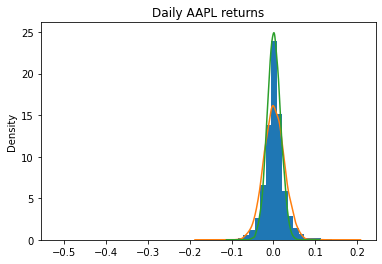

In [55]:
N = len(ret)
norm_aapl = pd.Series(np.random.normal(ret.aapl.mean(),ret.aapl.std(),N))
aapl_w = ret.aapl
aapl_w = aapl_w.where(np.abs(aapl_w)<0.04)
norm_aapl_w = pd.Series(np.random.normal(aapl_w.mean(),aapl_w.std(),N))

plt.title('Daily AAPL returns')
plt.hist(ret.aapl, bins=50, density=True, label=);
norm_aapl.plot.kde();
norm_aapl_w.plot.kde();